# AI - CA4
# Introduction to Machine Learning

## Introduction
In this assignment, machine learning is introduced along with some of it's basic learning methods.
We use the "Scikit Learn" library to implement the methods explained below. The dataset used in this assignment contains data about purchases made at a store (The price, quantity, date of purchase, customer id and the customer's country of origin are included) and if the customer has returned to the shop or not afterwards.

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, LabelBinarizer
from sklearn.compose import ColumnTransformer 
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_classif
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier
from pprint import pprint
from matplotlib import pyplot as plt

DATASET_FILENAME = 'data.csv'
CUSTOMER_ID = 'Customer ID'
QUANTITY = 'Total Quantity'
PRICE = 'Total Price'
COUNTRY = 'Country'
DATE = 'Date'
TARGET = 'Is Back'
PURCHASE_COUNT = 'Purchase Count'
MONTH = 'Month'
WEEKEND = 'Weekend'
MONTHS = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

In [2]:
primordial_df = pd.read_csv(DATASET_FILENAME)
primordial_df.head()

,Unnamed: 0,Customer ID,Total Quantity,Total Price,Country,Date,Is Back,Purchase Count
0,0,16995,-1,-1.25,United Kingdom,2010-12-02,No,1
1,1,12552,85,13.52,Italy,2011-10-31,Yes,19
2,2,13192,298,15.90,United Kingdom,2011-05-18,Yes,33
3,3,16934,399,8.30,United Kingdom,2011-10-16,No,62
4,4,14976,27,11.90,United Kingdom,2011-01-17,Yes,16


## Preprocessing

### Labeling the target variable
The target variable ("Is back" column) value is given as "Yes" or "No" strings, thus we have to label them numerically, labeling "Yes" as 1 and "No" as 0 and substituting the actual string with their labels.

In [3]:
working_df = primordial_df.copy()
binarizer = LabelBinarizer()
working_df[TARGET] = binarizer.fit_transform(working_df[TARGET])
working_df.head()

,Unnamed: 0,Customer ID,Total Quantity,Total Price,Country,Date,Is Back,Purchase Count
0,0,16995,-1,-1.25,United Kingdom,2010-12-02,0,1
1,1,12552,85,13.52,Italy,2011-10-31,1,19
2,2,13192,298,15.90,United Kingdom,2011-05-18,1,33
3,3,16934,399,8.30,United Kingdom,2011-10-16,0,62
4,4,14976,27,11.90,United Kingdom,2011-01-17,1,16


### Processing the "Country" column
The "Country" column contains categorical data (country names) and should be labeled before any further processing can be done on it.

In [4]:
country_label_encoder = LabelEncoder()
country_label_encoder.fit(working_df[COUNTRY])
COUNTRIES = list(country_label_encoder.classes_)
for i,j in enumerate(COUNTRIES):
    print('Label:', i, 'Country:', j)
working_df[COUNTRY] = country_label_encoder.transform(working_df[COUNTRY])
working_df.head()

Label: 0 Country: Australia
Label: 1 Country: Austria
Label: 2 Country: Bahrain
Label: 3 Country: Belgium
Label: 4 Country: Brazil
Label: 5 Country: Canada
Label: 6 Country: Channel Islands
Label: 7 Country: Cyprus
Label: 8 Country: Czech Republic
Label: 9 Country: Denmark
Label: 10 Country: EIRE
Label: 11 Country: European Community
Label: 12 Country: Finland
Label: 13 Country: France
Label: 14 Country: Germany
Label: 15 Country: Greece
Label: 16 Country: Iceland
Label: 17 Country: Israel
Label: 18 Country: Italy
Label: 19 Country: Japan
Label: 20 Country: Lebanon
Label: 21 Country: Lithuania
Label: 22 Country: Malta
Label: 23 Country: Netherlands
Label: 24 Country: Norway
Label: 25 Country: Poland
Label: 26 Country: Portugal
Label: 27 Country: RSA
Label: 28 Country: Saudi Arabia
Label: 29 Country: Singapore
Label: 30 Country: Spain
Label: 31 Country: Sweden
Label: 32 Country: Switzerland
Label: 33 Country: USA
Label: 34 Country: United Arab Emirates
Label: 35 Country: United Kingdom


,Unnamed: 0,Customer ID,Total Quantity,Total Price,Country,Date,Is Back,Purchase Count
0,0,16995,-1,-1.25,35,2010-12-02,0,1
1,1,12552,85,13.52,18,2011-10-31,1,19
2,2,13192,298,15.90,35,2011-05-18,1,33
3,3,16934,399,8.30,35,2011-10-16,0,62
4,4,14976,27,11.90,35,2011-01-17,1,16


### Calculating Information Gain
In this part, the information gain from the features included in the data frame is calculated. However, as the info gain calculator function understands numbers only, the date column should be labeled and the new date labels column is used instead of the date column.

As seen in the plot below, the "Index" and "Customer ID" columns have the most information gain.
Nevertheless, neither of these two columns have any value because they don't provide any information about the purchase and nothing can be predicted based on them as they are unique values, and cause the overfitting of the models.
Ignoring the columns stated above, "Total Quantity" and "Total Price" variables have a high info gain, and their info gain is also very similar which is because they are somehow tied together.

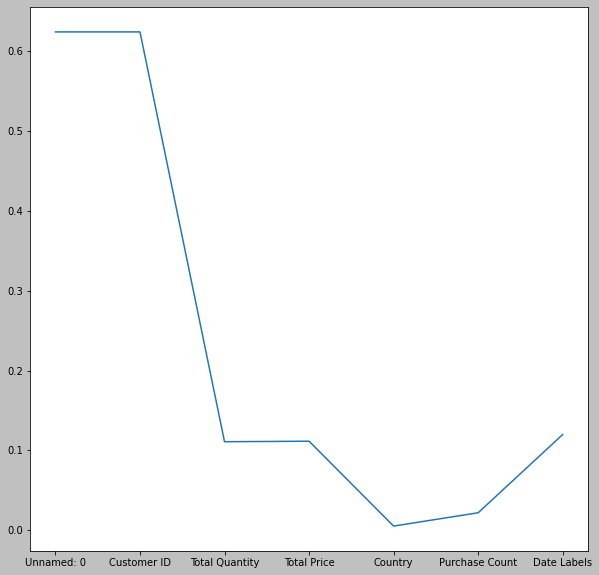

In [5]:
date_label_encoder = LabelEncoder()
date_label_encoder.fit(working_df[DATE])
working_df['Date Labels'] = date_label_encoder.transform(working_df[DATE])
features = list(working_df.columns)
features.remove(DATE)
features.remove(TARGET)
info_gain = [0 for i in range(len(features))]
for i in range(20):
    temp = mutual_info_classif(working_df[features], working_df[TARGET], discrete_features=True)
    for i, j in enumerate(temp):
        info_gain[i] += j
info_gain = list(map(lambda x: x/20, info_gain))
fig = plt.figure(facecolor='silver', figsize=(10,10))
plt.plot(features, info_gain)

### Dropping unused columns
The index and customer ID columns are dropped from the dataframe along with the date labels because they have no value in our classifications and cause overfitting of our trained models.

In [6]:
working_df.drop(primordial_df.columns[0], axis=1, inplace=True)
working_df.drop(columns=[CUSTOMER_ID, 'Date Labels'], inplace=True)

### Analysing the "Date" Column
The "Date" column contains the day of purchase for each row, which has little value to us and may cause overfitting. To solve this problem, two new columns are extracted from the date column and the date column itself is dropped. The new columns added to the dataframe are the month (indicating the month of the purchase) and the weekend (Indicating if the purchase was made on a weekend) columns.

In [7]:
working_df[DATE] = pd.to_datetime(working_df[DATE])
working_df[MONTH] = working_df[DATE].dt.month
working_df['Weekday'] = working_df[DATE].dt.weekday
working_df[WEEKEND] = np.where(working_df['Weekday'].isin([5, 6]),1,0)
working_df.drop(columns=['Weekday', DATE], inplace=True)
working_df.head()

,Total Quantity,Total Price,Country,Is Back,Purchase Count,Month,Weekend
0,-1,-1.25,35,0,1,12,0
1,85,13.52,18,1,19,10,0
2,298,15.90,35,1,33,5,0
3,399,8.30,35,0,62,10,1
4,27,11.90,35,1,16,1,0


### Encoding the "Country" and "Month" Columns
When processing a dataframe, the categorical data should be encoded using either label encoding or one hot encoding as they can not be processed as they are.

#### Label Encoding
In this encoding, each category is given a label (usually a numerical value) and the values are substituted with their labels. This encoding can only be used if the classifier does not try to compare the values of this variable, because if January and February are labeled as 1 and 2 for example, the fact that 2 > 1 does not mean anything in this case as it would mean that February > January.

The main advantage of Label Encoding is that it doesn't take any additional space.

#### One Hot Encoding
In one hot encoding, a new column is added to the dataframe per category, the original column is dropped, and the each row's corresponding category column value is set to 1 and the other columns set to 0. For example a new column is added to the dataframe for each month of the year, and if a purchase is made in January, it's Januray column value is set to 1 and the other month columns is set to 0.

One Hot Encoding's main advantage is it treats the categories as binary vectors instead of ordinal data, but the problem is that if there are a lot of categories to be encoded, the space it takes would increase drastically and it may result in the Curse of Dimensionality which is the problem where there are too many features in the data and it may cause problems for some of the classifiers such as KNN classifier.

In this assignment we use One Hot Encoding for the "Country" and "Month" columns as all of the classifiers would work with this encoding.

In [8]:
column_transformer = ColumnTransformer(
    [('encoder', OneHotEncoder(), [COUNTRY, MONTH])], 
    remainder='passthrough', sparse_threshold=0
) 
ohe_array = column_transformer.fit_transform(working_df)
working_df = pd.DataFrame(ohe_array)
working_df.columns = [*COUNTRIES, *MONTHS, QUANTITY, PRICE, TARGET, PURCHASE_COUNT, WEEKEND]
working_df.head()

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,August,September,October,November,December,Total Quantity,Total Price,Is Back,Purchase Count,Weekend
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,-1.0,-1.25,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,85.0,13.52,1.0,19.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,298.0,15.90,1.0,33.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,399.0,8.30,0.0,62.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,27.0,11.90,1.0,16.0,0.0


In [9]:
int_columns = list(working_df.columns)
int_columns.remove(PRICE)
working_df[int_columns] = working_df[int_columns].apply(pd.to_numeric, downcast='integer')
working_df.head()

,Australia,Austria,Bahrain,Belgium,Brazil,Canada,Channel Islands,Cyprus,Czech Republic,Denmark,...,August,September,October,November,December,Total Quantity,Total Price,Is Back,Purchase Count,Weekend
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,-1,-1.25,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,85,13.52,1,19,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,298,15.90,1,33,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,399,8.30,0,62,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,27,11.90,1,16,0


## Decision Tree Classification Results
The decision tree classification results are plotted below for the max_depth hyper parameter values of 1 to 40.
As seen below, the best accuracy is reached when the max_depth value is 2 (but this differs based on the train and test data which are randomly selected from the dataframe), and the test and train metrics are almost similar which shows that overfitting hasn't occured at that depth. as the max depth increases overfitting occures and the metrics for the test data decreases

In [10]:
MAX_DEPTH_ITERATION_LIMIT = 40
train_vals = []
test_vals = []
features = list(working_df.columns)
features.remove(TARGET)
train, test = train_test_split(working_df, test_size=0.2)
max_accuracy = 0
for md in range(1, MAX_DEPTH_ITERATION_LIMIT):
    dt_classifier = DecisionTreeClassifier(max_depth=md, random_state=None)
    dt_classifier.fit(train[features], train[TARGET])
    dt_predictions = dt_classifier.predict(test[features])
    test_vals.append([
        md,
        metrics.accuracy_score(test[TARGET], dt_predictions),
        metrics.precision_score(test[TARGET], dt_predictions, average='weighted', zero_division=0),
        metrics.recall_score(test[TARGET], dt_predictions, average='weighted', zero_division=0),
    ])
    dt_train_pred = dt_classifier.predict(train[features])
    train_vals.append([
        md,
        metrics.accuracy_score(train[TARGET], dt_train_pred),
        metrics.precision_score(train[TARGET], dt_train_pred, average='weighted', zero_division=0),
        metrics.recall_score(train[TARGET], dt_train_pred, average='weighted', zero_division=0),
    ])
    if metrics.accuracy_score(test[TARGET], dt_predictions) > max_accuracy:
        max_accuracy = metrics.accuracy_score(test[TARGET], dt_predictions)
        report = md, metrics.classification_report(test[TARGET], dt_predictions, zero_division=0)
dt_test_res = pd.DataFrame(test_vals)
dt_train_res = pd.DataFrame(train_vals)
dt_test_res.columns = dt_train_res.columns = ['Max Depth', 'Accuracy', 'Precision', 'Recall']
print('Maximum accuracy occured at Max Depth =', report[0])
print(report[1])

Maximum accuracy occured at Max Depth = 2
              precision    recall  f1-score   support

           0       0.63      0.33      0.43       260
           1       0.76      0.92      0.83       614

    accuracy                           0.74       874
   macro avg       0.70      0.62      0.63       874
weighted avg       0.72      0.74      0.72       874



In [11]:
maximum_accuracy_depth = dt_test_res.loc[dt_test_res['Accuracy'].idxmax()]
maximum_accuracy_depth

Max Depth    2.000000
Accuracy     0.743707
Precision    0.724997
Recall       0.743707
Name: 1, dtype: float64

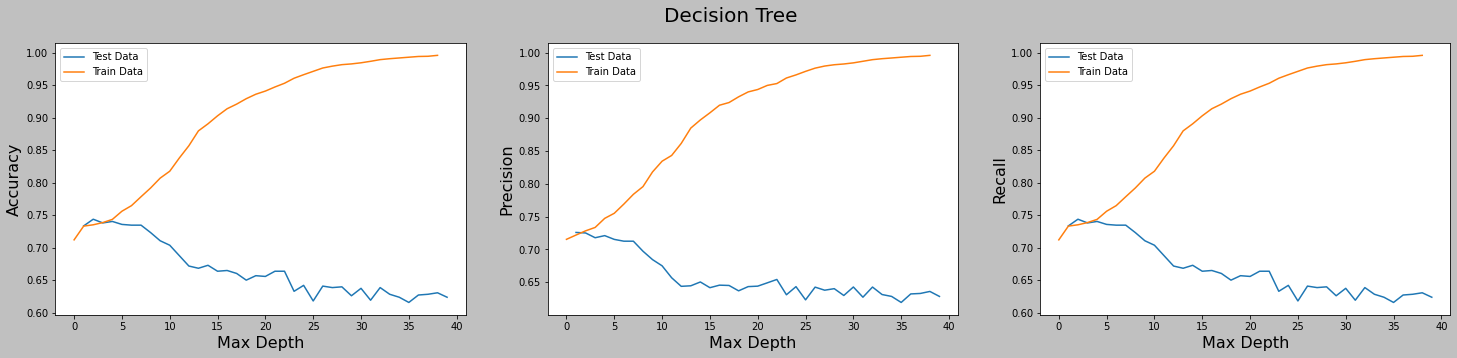

In [12]:
fig , (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_facecolor('silver')
legend_labels = ['Test Data', 'Train Data']
fig.set_figheight(5)
fig.set_figwidth(25)
fig.suptitle('Decision Tree', fontsize=20)
ax1.plot(dt_test_res['Max Depth'], dt_test_res['Accuracy'], dt_train_res['Accuracy'])
ax1.set_ylabel('Accuracy', fontsize=16)
ax1.set_xlabel('Max Depth', fontsize=16)
ax1.legend(legend_labels)
ax2.plot(dt_test_res['Max Depth'], dt_test_res['Precision'], dt_train_res['Precision'])
ax2.set_ylabel('Precision', fontsize=16)
ax2.set_xlabel('Max Depth', fontsize=16)
ax2.legend(legend_labels)
ax3.plot(dt_test_res['Max Depth'], dt_test_res['Recall'], dt_train_res['Recall'])
ax3.set_ylabel('Recall', fontsize=16)
ax3.set_xlabel('Max Depth', fontsize=16)
ax3.legend(legend_labels)

## KNN Classification
In KNN classification, as opposed to the Decision Tree classification, the overfitting occurs at lower K values because the prediction is only based on a few other nodes but when the K value increases, more nodes are taken into consideration and anomalies and noises have lower impact on the predictions. The metrics for K values from 1 to 99 is plotted below, and as seen, the best accuracy occurs when K = 49 (but this differs based on the train and test data which are randomly selected from the dataframe). K is usually set to an odd value to have a tie breaker.

In [13]:
K_ITERATION_LIMIT = 100
train_vals = []
test_vals = []
features = list(working_df.columns)
features.remove(TARGET)
train, test = train_test_split(working_df, test_size=0.2)
max_accuracy = 0
for k in range(1, K_ITERATION_LIMIT):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(train[features], train[TARGET])
    knn_predictions = knn_classifier.predict(test[features])
    test_vals.append([
        k,
        metrics.accuracy_score(test[TARGET], knn_predictions),
        metrics.precision_score(test[TARGET], knn_predictions, average='weighted', zero_division = 0),
        metrics.recall_score(test[TARGET], knn_predictions, average='weighted', zero_division = 0),
    ])
    knn_train_pred = knn_classifier.predict(train[features])
    train_vals.append([
        k,
        metrics.accuracy_score(train[TARGET], knn_train_pred),
        metrics.precision_score(train[TARGET], knn_train_pred, average='weighted', zero_division = 0),
        metrics.recall_score(train[TARGET], knn_train_pred, average='weighted', zero_division = 0),
    ])
    if metrics.accuracy_score(test[TARGET], knn_predictions) > max_accuracy:
        max_accuracy = metrics.accuracy_score(test[TARGET], knn_predictions)
        report = k, metrics.classification_report(test[TARGET], knn_predictions)

knn_test_res = pd.DataFrame(test_vals)
knn_train_res = pd.DataFrame(train_vals)
knn_test_res.columns = knn_train_res.columns = ['K', 'Accuracy', 'Precision', 'Recall']
print('Maximum accuracy occured at K =', report[0])
print(report[1])

Maximum accuracy occured at K = 49
              precision    recall  f1-score   support

           0       0.57      0.01      0.03       269
           1       0.69      1.00      0.82       605

    accuracy                           0.69       874
   macro avg       0.63      0.50      0.42       874
weighted avg       0.66      0.69      0.58       874



In [14]:
maximum_accuracy_k = knn_test_res.loc[knn_test_res['Accuracy'].idxmax()]
maximum_accuracy_k

K            49.000000
Accuracy      0.693364
Precision     0.656516
Recall        0.693364
Name: 48, dtype: float64

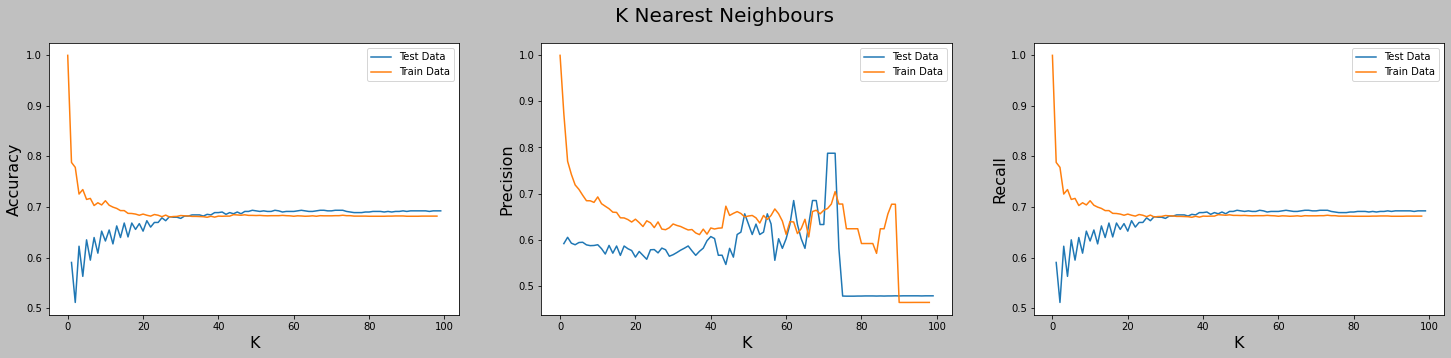

In [15]:
fig , (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_facecolor('silver')
legend_labels = ['Test Data', 'Train Data']
fig.set_figheight(5)
fig.set_figwidth(25)
fig.suptitle('K Nearest Neighbours', fontsize=20)
ax1.plot(knn_test_res['K'], knn_test_res['Accuracy'], knn_train_res['Accuracy'])
ax1.set_ylabel('Accuracy', fontsize=16)
ax1.set_xlabel('K', fontsize=16)
ax1.legend(legend_labels)
ax2.plot(knn_test_res['K'], knn_test_res['Precision'], knn_train_res['Precision'])
ax2.set_ylabel('Precision', fontsize=16)
ax2.set_xlabel('K', fontsize=16)
ax2.legend(legend_labels)
ax3.plot(knn_test_res['K'], knn_test_res['Recall'], knn_train_res['Recall'])
ax3.set_ylabel('Recall', fontsize=16)
ax3.set_xlabel('K', fontsize=16)
ax3.legend(legend_labels)

## Logistic Regressor
The logistic regressor doesn't have any hyperparameters to be tuned, so it was only ran once and it's results are printed below.

In [16]:
train_vals = []
test_vals = []
features = list(working_df.columns)
features.remove(TARGET)
logistic_regressor = LogisticRegression(max_iter=10000)
train, test = train_test_split(working_df, test_size=0.2)
logistic_regressor.fit(train[features],train[TARGET])
lr_predictions = logistic_regressor.predict(test[features])
lr_train_predictions = logistic_regressor.predict(train[features])
print('Test: ')
print(metrics.classification_report(test[TARGET], lr_predictions, zero_division=0))
print('Train: ')
print(metrics.classification_report(train[TARGET], lr_train_predictions, zero_division=0))

Test: 
              precision    recall  f1-score   support

           0       0.61      0.30      0.40       268
           1       0.75      0.92      0.82       606

    accuracy                           0.73       874
   macro avg       0.68      0.61      0.61       874
weighted avg       0.71      0.73      0.70       874

Train: 
              precision    recall  f1-score   support

           0       0.69      0.36      0.48      1112
           1       0.76      0.92      0.83      2380

    accuracy                           0.75      3492
   macro avg       0.72      0.64      0.65      3492
weighted avg       0.74      0.75      0.72      3492



## Implementing Bagging Classification using KNN Classifiers
The bagging classifier has been used with it's default number of estimators, and the result plots are drawn below for different K values. Bagging splits the training dataset into $m$ chunks and fits $m$ classifiers using those chunks and then averages their votes. However as we have a small dataset in this assignment, the bagging method can't improve the classifiers' metrics much.

In [17]:
max_accuracy = 0
train_vals = []
test_vals = []
features = list(working_df.columns)
features.remove(TARGET)
train, test = train_test_split(working_df, test_size=0.2)
for k in range(1, K_ITERATION_LIMIT):
    knn_bagging = BaggingClassifier(KNeighborsClassifier(n_neighbors=k), max_features=0.5, max_samples=0.5)
    knn_bagging.fit(train[features], train[TARGET])
    knn_bagging_pred = knn_bagging.predict(test[features])
    test_vals.append([
        k,
        metrics.accuracy_score(test[TARGET], knn_bagging_pred),
        metrics.precision_score(test[TARGET], knn_bagging_pred, average='weighted', zero_division = 0),
        metrics.recall_score(test[TARGET], knn_bagging_pred, average='weighted', zero_division = 0),
    ])
    knn_bagging_train_pred = knn_bagging.predict(train[features])
    train_vals.append([
        k,
        metrics.accuracy_score(train[TARGET], knn_bagging_train_pred),
        metrics.precision_score(train[TARGET], knn_bagging_train_pred, average='weighted', zero_division = 0),
        metrics.recall_score(train[TARGET], knn_bagging_train_pred, average='weighted', zero_division = 0),
    ])
    if metrics.accuracy_score(test[TARGET], knn_bagging_pred) > max_accuracy:
        max_accuracy = metrics.accuracy_score(test[TARGET], knn_bagging_pred)
        report = k, metrics.classification_report(test[TARGET], knn_bagging_pred, zero_division=0)
knn_bagging_test_res = pd.DataFrame(test_vals)
knn_bagging_train_res = pd.DataFrame(train_vals)
knn_bagging_test_res.columns = knn_bagging_train_res.columns = ['K', 'Accuracy', 'Precision', 'Recall']
print('Test: (K = {})'.format(report[0]))
print(report[1])

Test: (K = 1)
              precision    recall  f1-score   support

           0       0.56      0.25      0.35       264
           1       0.74      0.91      0.82       610

    accuracy                           0.72       874
   macro avg       0.65      0.58      0.58       874
weighted avg       0.69      0.72      0.68       874



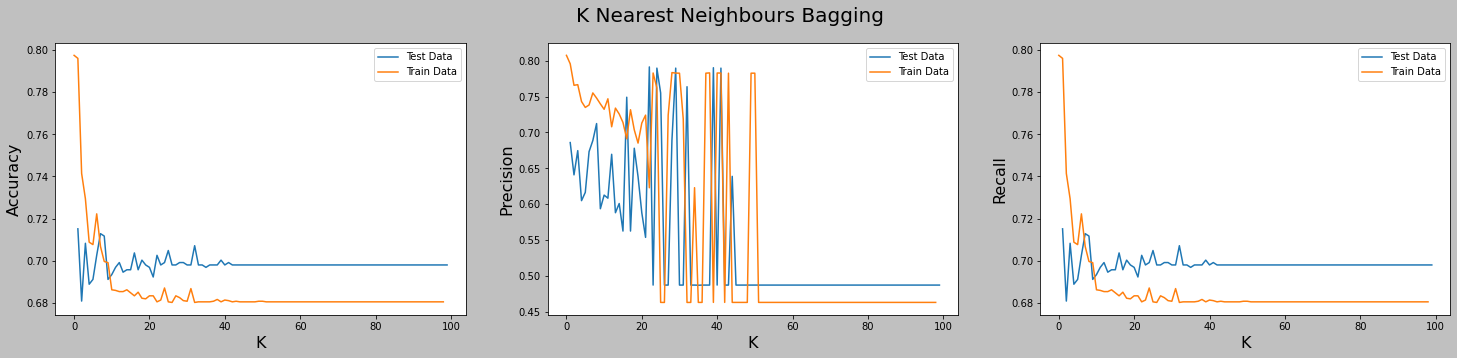

In [18]:
fig , (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_facecolor('silver')
legend_labels = ['Test Data', 'Train Data']
fig.set_figheight(5)
fig.set_figwidth(25)
fig.suptitle('K Nearest Neighbours Bagging', fontsize=20)
ax1.plot(knn_bagging_test_res['K'], knn_bagging_test_res['Accuracy'], knn_bagging_train_res['Accuracy'])
ax1.set_ylabel('Accuracy', fontsize=16)
ax1.set_xlabel('K', fontsize=16)
ax1.legend(legend_labels)
ax2.plot(knn_bagging_test_res['K'], knn_bagging_test_res['Precision'], knn_bagging_train_res['Precision'])
ax2.set_ylabel('Precision', fontsize=16)
ax2.set_xlabel('K', fontsize=16)
ax2.legend(legend_labels)
ax3.plot(knn_bagging_test_res['K'], knn_bagging_test_res['Recall'], knn_bagging_train_res['Recall'])
ax3.set_ylabel('Recall', fontsize=16)
ax3.set_xlabel('K', fontsize=16)
ax3.legend(legend_labels)

In [19]:
max_accuracy = 0
train_vals = []
test_vals = []
features = list(working_df.columns)
features.remove(TARGET)
train, test = train_test_split(working_df, test_size=0.2)
for md in range(1, MAX_DEPTH_ITERATION_LIMIT):
    dt_bagging = BaggingClassifier(DecisionTreeClassifier(max_depth=md), max_features=0.5, max_samples=0.5)
    dt_bagging.fit(train[features], train[TARGET])
    dt_bagging_pred = dt_bagging.predict(test[features])
    test_vals.append([
        md,
        metrics.accuracy_score(test[TARGET], dt_bagging_pred),
        metrics.precision_score(test[TARGET], dt_bagging_pred, average='weighted', zero_division = 0),
        metrics.recall_score(test[TARGET], dt_bagging_pred, average='weighted', zero_division = 0),
    ])
    dt_bagging_train_pred = dt_bagging.predict(train[features])
    train_vals.append([
        md,
        metrics.accuracy_score(train[TARGET], dt_bagging_train_pred),
        metrics.precision_score(train[TARGET], dt_bagging_train_pred, average='weighted', zero_division = 0),
        metrics.recall_score(train[TARGET], dt_bagging_train_pred, average='weighted', zero_division = 0),
    ])
    if metrics.accuracy_score(test[TARGET], dt_bagging_pred) > max_accuracy:
        max_accuracy = metrics.accuracy_score(test[TARGET], dt_bagging_pred)
        report = md, metrics.classification_report(test[TARGET], dt_bagging_pred, zero_division=0)
dt_bagging_test_res = pd.DataFrame(test_vals)
dt_bagging_train_res = pd.DataFrame(train_vals)
dt_bagging_test_res.columns = dt_bagging_train_res.columns = ['Max Depth', 'Accuracy', 'Precision', 'Recall']
print('Test: (Max Depth = {})'.format(report[0]))
print(report[1])

Test: (Max Depth = 3)
              precision    recall  f1-score   support

           0       0.72      0.25      0.37       281
           1       0.73      0.95      0.83       593

    accuracy                           0.73       874
   macro avg       0.72      0.60      0.60       874
weighted avg       0.72      0.73      0.68       874



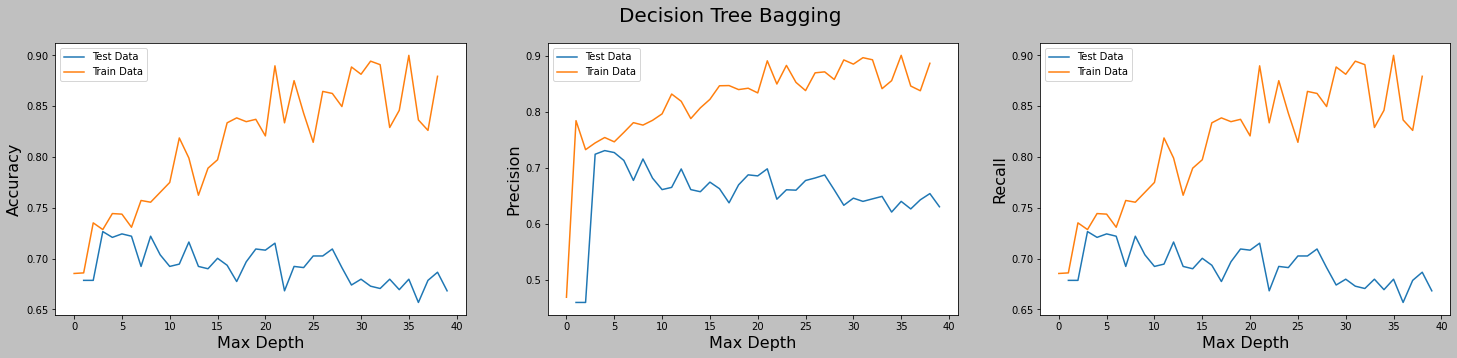

In [20]:
fig , (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_facecolor('silver')
legend_labels = ['Test Data', 'Train Data']
fig.set_figheight(5)
fig.set_figwidth(25)
fig.suptitle('Decision Tree Bagging', fontsize=20)
ax1.plot(dt_bagging_test_res['Max Depth'], dt_bagging_test_res['Accuracy'], dt_bagging_train_res['Accuracy'])
ax1.set_ylabel('Accuracy', fontsize=16)
ax1.set_xlabel('Max Depth', fontsize=16)
ax1.legend(legend_labels)
ax2.plot(dt_bagging_test_res['Max Depth'], dt_bagging_test_res['Precision'], dt_bagging_train_res['Precision'])
ax2.set_ylabel('Precision', fontsize=16)
ax2.set_xlabel('Max Depth', fontsize=16)
ax2.legend(legend_labels)
ax3.plot(dt_bagging_test_res['Max Depth'], dt_bagging_test_res['Recall'], dt_bagging_train_res['Recall'])
ax3.set_ylabel('Recall', fontsize=16)
ax3.set_xlabel('Max Depth', fontsize=16)
ax3.legend(legend_labels)

In [21]:
max_accuracy = 0
train_vals = []
test_vals = []
features = list(working_df.columns)
features.remove(TARGET)
train, test = train_test_split(working_df, test_size=0.2)
for md in range(1,MAX_DEPTH_ITERATION_LIMIT):
    dt_forest = RandomForestClassifier(max_features=0.5, max_samples=0.5, max_depth=md)
    dt_forest.fit(train[features], train[TARGET])
    forest_pred = dt_forest.predict(test[features])
    test_vals.append([
        md,
        metrics.accuracy_score(test[TARGET], forest_pred),
        metrics.precision_score(test[TARGET], forest_pred, average='weighted', zero_division = 0),
        metrics.recall_score(test[TARGET], forest_pred, average='weighted', zero_division = 0),
    ])
    forest_train_pred = dt_forest.predict(train[features])
    train_vals.append([
        md,
        metrics.accuracy_score(train[TARGET], forest_train_pred),
        metrics.precision_score(train[TARGET], forest_train_pred, average='weighted', zero_division = 0),
        metrics.recall_score(train[TARGET], forest_train_pred, average='weighted', zero_division = 0),
    ])
    if metrics.accuracy_score(test[TARGET], forest_pred) > max_accuracy:
        max_accuracy = metrics.accuracy_score(test[TARGET], forest_pred)
        report = md, metrics.classification_report(test[TARGET], forest_pred, zero_division=0)
forest_test_res = pd.DataFrame(test_vals)
forest_train_res = pd.DataFrame(train_vals)
forest_test_res.columns = forest_train_res.columns = ['Max Depth', 'Accuracy', 'Precision', 'Recall']
print('Test: (Max Depth = {})'.format(report[0]))
print(report[1])

Test: (Max Depth = 25)
              precision    recall  f1-score   support

           0       0.67      0.36      0.47       286
           1       0.75      0.91      0.82       588

    accuracy                           0.73       874
   macro avg       0.71      0.64      0.65       874
weighted avg       0.72      0.73      0.71       874



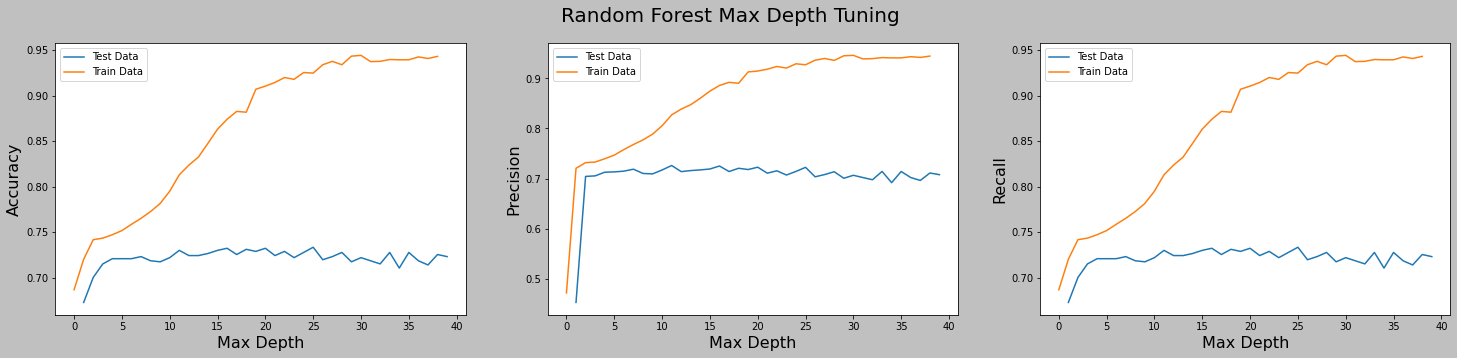

In [22]:
fig , (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_facecolor('silver')
legend_labels = ['Test Data', 'Train Data']
fig.set_figheight(5)
fig.set_figwidth(25)
fig.suptitle('Random Forest Max Depth Tuning', fontsize=20)
ax1.plot(forest_test_res['Max Depth'], forest_test_res['Accuracy'], forest_train_res['Accuracy'])
ax1.set_ylabel('Accuracy', fontsize=16)
ax1.set_xlabel('Max Depth', fontsize=16)
ax1.legend(legend_labels)
ax2.plot(forest_test_res['Max Depth'], forest_test_res['Precision'], forest_train_res['Precision'])
ax2.set_ylabel('Precision', fontsize=16)
ax2.set_xlabel('Max Depth', fontsize=16)
ax2.legend(legend_labels)
ax3.plot(forest_test_res['Max Depth'], forest_test_res['Recall'], forest_train_res['Recall'])
ax3.set_ylabel('Recall', fontsize=16)
ax3.set_xlabel('Max Depth', fontsize=16)
ax3.legend(legend_labels)

In [23]:
max_accuracy = 0
train_vals = []
test_vals = []
features = list(working_df.columns)
features.remove(TARGET)
train, test = train_test_split(working_df, test_size=0.2)
ESTIMATORS_COUNT_RANGE = (50,1000)
for ec in range(*ESTIMATORS_COUNT_RANGE, 50):
    dt_forest = RandomForestClassifier(max_features=0.5, max_samples=0.5, max_depth=8, n_estimators=ec)
    dt_forest.fit(train[features], train[TARGET])
    forest_pred = dt_forest.predict(test[features])
    test_vals.append([
        ec,
        metrics.accuracy_score(test[TARGET], forest_pred),
        metrics.precision_score(test[TARGET], forest_pred, average='weighted', zero_division = 0),
        metrics.recall_score(test[TARGET], forest_pred, average='weighted', zero_division = 0),
    ])
    forest_train_pred = dt_forest.predict(train[features])
    train_vals.append([
        ec,
        metrics.accuracy_score(train[TARGET], forest_train_pred),
        metrics.precision_score(train[TARGET], forest_train_pred, average='weighted', zero_division = 0),
        metrics.recall_score(train[TARGET], forest_train_pred, average='weighted', zero_division = 0),
    ])
    if metrics.accuracy_score(test[TARGET], forest_pred) > max_accuracy:
        max_accuracy = metrics.accuracy_score(test[TARGET], forest_pred)
        report = ec, metrics.classification_report(test[TARGET], forest_pred, zero_division=0)
forest_test_res = pd.DataFrame(test_vals)
forest_train_res = pd.DataFrame(train_vals)
forest_test_res.columns = forest_train_res.columns = ['Estimators Count', 'Accuracy', 'Precision', 'Recall']
print('Test: (Estimators Count = {})'.format(report[0]))
print(report[1])

Test: (Estimators Count = 200)
              precision    recall  f1-score   support

           0       0.70      0.35      0.47       274
           1       0.76      0.93      0.84       600

    accuracy                           0.75       874
   macro avg       0.73      0.64      0.65       874
weighted avg       0.74      0.75      0.72       874



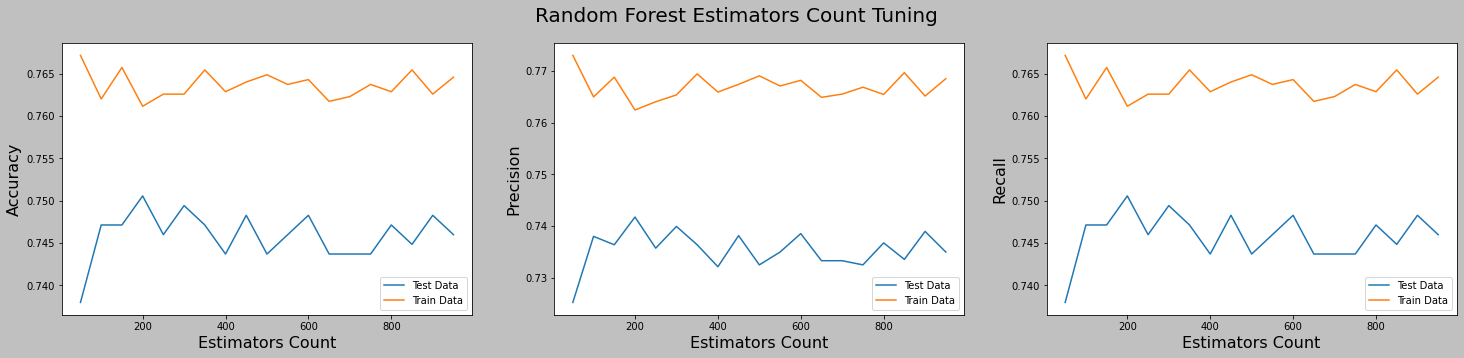

In [24]:
fig , (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3)
fig.set_facecolor('silver')
legend_labels = ['Test Data', 'Train Data']
fig.set_figheight(5)
fig.set_figwidth(25)
fig.suptitle('Random Forest Estimators Count Tuning', fontsize=20)
ax1.plot(forest_test_res['Estimators Count'], forest_test_res['Accuracy'], forest_test_res['Estimators Count'], forest_train_res['Accuracy'])
ax1.set_ylabel('Accuracy', fontsize=16)
ax1.set_xlabel('Estimators Count', fontsize=16)
ax1.legend(legend_labels)
ax2.plot(forest_test_res['Estimators Count'], forest_test_res['Precision'], forest_test_res['Estimators Count'], forest_train_res['Precision'])
ax2.set_ylabel('Precision', fontsize=16)
ax2.set_xlabel('Estimators Count', fontsize=16)
ax2.legend(legend_labels)
ax3.plot(forest_test_res['Estimators Count'], forest_test_res['Recall'], forest_test_res['Estimators Count'], forest_train_res['Recall'])
ax3.set_ylabel('Recall', fontsize=16)
ax3.set_xlabel('Estimators Count', fontsize=16)
ax3.legend(legend_labels)

## Voting Classifier
Voting classifier consists of many different classifiers (Three classifers in our case, a Decision Tree classifier, a KNN classifier and a logistic regressor. For each piece of data, the classifiers give their votes and the class with the most votes gets selected as the final prediction.

Again (as with the other ensemble classifiers) we see that there isn't much improvement upon the metrics, which is a result of the reasons given earlier.

In [25]:
vc = VotingClassifier([
    ('dt', DecisionTreeClassifier(max_depth=int(maximum_accuracy_depth['Max Depth']))),
    ('knn', KNeighborsClassifier(n_neighbors=int(maximum_accuracy_k['K']))),
    ('lr', LogisticRegression(max_iter=1000)),
])
features = list(working_df.columns)
features.remove(TARGET)
train, test = train_test_split(working_df, test_size=0.2)
vc.fit(train[features], train[TARGET])
vc_pred = vc.predict(test[features])
vc_train_pred = vc.predict(train[features])
print('Test: ')
print(metrics.classification_report(test[TARGET], vc_pred, zero_division=0))
print('Train: ')
print(metrics.classification_report(train[TARGET], vc_train_pred, zero_division=0))

Test: 
              precision    recall  f1-score   support

           0       0.68      0.32      0.44       257
           1       0.77      0.94      0.84       617

    accuracy                           0.76       874
   macro avg       0.73      0.63      0.64       874
weighted avg       0.74      0.76      0.72       874

Train: 
              precision    recall  f1-score   support

           0       0.67      0.32      0.43      1123
           1       0.74      0.93      0.82      2369

    accuracy                           0.73      3492
   macro avg       0.71      0.62      0.63      3492
weighted avg       0.72      0.73      0.70      3492



## How Bagging affects Overfitting
To find out about the effects of bagging on overfitting, we use bagging with a Decision Tree Classifier and set the max_depth to 15 (Which is clearly overfitted based on the results above).

As seen below, bagging improves the overfitting problem a little, but can't prevent overfitting completely or have a drastic effect on it. The dataframe isn't big enough and the rows provide similar information in our case and this might be affect the bagging's performance, but generally, bagging reduces overfitting because each individual tree has less data to overfit on and the bagged predictor will be more stable than any of the individuals.

In [26]:
train, test = train_test_split(working_df, test_size=0.2)
dt = DecisionTreeClassifier(max_depth=40)
features = list(working_df.columns)
features.remove(TARGET)
dt.fit(train[features], train[TARGET])
test_pred = dt.predict(test[features])
train_pred = dt.predict(train[features])
print('Test Results:')
print(metrics.classification_report(test[TARGET], test_pred))
print('Train Results:')
print(metrics.classification_report(train[TARGET], train_pred))

Test Results:
              precision    recall  f1-score   support

           0       0.44      0.41      0.42       278
           1       0.73      0.75      0.74       596

    accuracy                           0.64       874
   macro avg       0.58      0.58      0.58       874
weighted avg       0.64      0.64      0.64       874

Train Results:
              precision    recall  f1-score   support

           0       0.99      1.00      1.00      1102
           1       1.00      1.00      1.00      2390

    accuracy                           1.00      3492
   macro avg       1.00      1.00      1.00      3492
weighted avg       1.00      1.00      1.00      3492



In [27]:
dtb = BaggingClassifier(DecisionTreeClassifier(max_depth=40))
train, test = train_test_split(working_df, test_size=0.2)
features = list(working_df.columns)
features.remove(TARGET)
dtb.fit(train[features], train[TARGET])
test_pred = dtb.predict(test[features])
train_pred = dtb.predict(train[features])
print('Test Results:')
print(metrics.classification_report(test[TARGET], test_pred))
print('Train Results:')
print(metrics.classification_report(train[TARGET], train_pred))

Test Results:
              precision    recall  f1-score   support

           0       0.53      0.42      0.47       288
           1       0.74      0.81      0.78       586

    accuracy                           0.68       874
   macro avg       0.63      0.62      0.62       874
weighted avg       0.67      0.68      0.67       874

Train Results:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97      1092
           1       0.98      0.99      0.99      2400

    accuracy                           0.98      3492
   macro avg       0.98      0.98      0.98      3492
weighted avg       0.98      0.98      0.98      3492



## Bootstrapping Effects on Variance and Bias
Variance is a measure of how much our prediction would change if we trained it on different data. High variance typicaly means that we are overfitting to our training data, finding patterns and complexity that are a product of randomness as opposed to some real trend.

A model is biased if it systematically under or over predicts the target variable. In machine learning, this is often the result either of the statistical assumptions made by our model of choice or of bias in the training data.

Bootstrapping gets the results of many classifiers trained with different random data from the training dataset, resulting in lower variance and bias because aggregating the results of a number of classifiers is more stable than an individual one so it decreases the variance and on the other hand, if there is a bias in a part of the dataset, only  a few classifiers see it and it won't affect the bagged predictor's predictions as much as it would affect an individual classifier's prediction.

## Comparing the classifier results from phase 1
As seen below, the results of the classifiers are very much similar ( > 80% ) and this results in ensemble learning not being as effective as it can be! 

In [28]:
dt = DecisionTreeClassifier(max_depth=int(maximum_accuracy_depth['Max Depth']))
knn = KNeighborsClassifier(n_neighbors=int(maximum_accuracy_k['K']))
lr = LogisticRegression(max_iter=1000)
features = list(working_df.columns)
features.remove(TARGET)
train, test = train_test_split(working_df, test_size=0.2)
dt.fit(train[features], train[TARGET])
knn.fit(train[features], train[TARGET])
lr.fit(train[features], train[TARGET])
dt_pred = dt.predict(test[features])
knn_pred = knn.predict(test[features])
lr_pred = lr.predict(test[features])
dt_train_pred = dt.predict(train[features])
knn_train_pred = knn.predict(train[features])
lr_train_pred = lr.predict(train[features])
dt_knn_similarities = 0
dt_lr_similarities = 0
knn_lr_similarities = 0
train_dt_knn_similarities = 0
train_dt_lr_similarities = 0
train_knn_lr_similarities = 0
for i in range(len(dt_pred)):
    if dt_pred[i] == knn_pred[i]:
        dt_knn_similarities += 1
    if dt_pred[i] == lr_pred[i]:
        dt_lr_similarities += 1
    if lr_pred[i] == knn_pred[i]:
        knn_lr_similarities += 1
    if dt_train_pred[i] == knn_train_pred[i]:
        train_dt_knn_similarities += 1
    if dt_train_pred[i] == lr_train_pred[i]:
        train_dt_lr_similarities += 1
    if lr_train_pred[i] == knn_train_pred[i]:
        train_knn_lr_similarities += 1
train_knn_lr_similarities = (train_knn_lr_similarities / len(dt_pred)) * 100
train_dt_lr_similarities = (train_dt_lr_similarities / len(dt_pred)) * 100
train_dt_knn_similarities = (train_dt_knn_similarities / len(dt_pred)) * 100
knn_lr_similarities = (knn_lr_similarities / len(dt_pred)) * 100
dt_lr_similarities = (dt_lr_similarities / len(dt_pred)) * 100
dt_knn_similarities = (dt_knn_similarities / len(dt_pred)) * 100
print('Decision Tree and KNN similarities:')
print('Test: {}, Train: {}'.format(dt_knn_similarities, train_dt_knn_similarities))
print('Decision Tree and Logistic Regression:')
print('Test: {}, Train: {}'.format(dt_lr_similarities, train_dt_lr_similarities))
print('KNN and Logistic Regression:')
print('Test: {}, Train: {}'.format(knn_lr_similarities, train_knn_lr_similarities))

Decision Tree and KNN similarities:
Test: 84.78260869565217, Train: 83.29519450800915
Decision Tree and Logistic Regression:
Test: 99.4279176201373, Train: 99.19908466819221
KNN and Logistic Regression:
Test: 84.89702517162472, Train: 83.63844393592677
